In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import numpy as np

from matplotlib.lines import Line2D 
from matplotlib.gridspec import GridSpec

# Functions

In [2]:
def plot_soma_amp_freq(amp_file_path):
    # Load the data from the .npy file
    amp_data = np.load(amp_file_path, allow_pickle=True).item()
    
    plt.figure(figsize=(10, 6))
    
    # Separate cells based on their type
    stick_cells = {name: data for name, data in amp_data.items() if "Stick" in name}
    bns_cells = {name: data for name, data in amp_data.items() if "BnS" in name}
    bntwos_cells_1000 = {name: data for name, data in amp_data.items() if "Bn2S" in name and "_1000_" in name}
    bntwos_cells_100 = {name: data for name, data in amp_data.items() if "Bn2S" in name and "_100_" in name}
    twocomp_cells = {name: data for name, data in amp_data.items() if "TwoComp" in name}
    real_cells = {name: data for name, data in amp_data.items() if name not in stick_cells and name not in bns_cells and name not in bntwos_cells_1000 and name not in bntwos_cells_100 and name not in twocomp_cells}

    # Define colormaps with adjusted ranges to avoid very light colors
    if stick_cells:
        yellow_sticks = cm.get_cmap('YlOrBr', 256)(np.linspace(0.3, 0.5, len(stick_cells)))
    if bns_cells:
        green_bns = cm.get_cmap('Greens', 256)(np.linspace(0.3, 0.8, len(bns_cells)))
    if bntwos_cells_1000:
        blue_bntwos = cm.get_cmap('Blues', 256)(np.linspace(0.3, 0.8, len(bntwos_cells_1000)))
    if bntwos_cells_100:
        purple_bntwos = cm.get_cmap('Purples', 256)(np.linspace(0.3, 0.7, len(bntwos_cells_100)))

    # Plot Stick cells
    for idx, (cell_name, data) in enumerate(stick_cells.items()):
        plt.loglog(data['freq'], data['soma_vmem_amp'], label=f'{unique_cell_dict[cell_name]}', color=yellow_sticks[idx])
    
    # Plot Ball and Stick cells
    for idx, (cell_name, data) in enumerate(bns_cells.items()):
        plt.loglog(data['freq'], data['soma_vmem_amp'], label=f'{unique_cell_dict[cell_name]}', color=green_bns[idx])

    # Plot Ball and Two Sticks cells with 1000 µm upper dendrite length
    for idx, (cell_name, data) in enumerate(bntwos_cells_1000.items()):
        if cell_name != "Bn2S_dendrite_len_1000_and_-1000.0":
            plt.loglog(data['freq'], data['soma_vmem_amp'], label=f'{unique_cell_dict[cell_name]}', color=blue_bntwos[idx])

    # Plot Ball and Two Sticks cells with 100 µm upper dendrite length
    for idx, (cell_name, data) in enumerate(bntwos_cells_100.items()):
        if cell_name != "Bn2S_dendrite_len_100_and_-100.0":
            plt.loglog(data['freq'], data['soma_vmem_amp'], label=f'{unique_cell_dict[cell_name]}', color=purple_bntwos[idx], linestyle = (0, (4, 0.5)))

    # Plot Two-Compartment cell with orange color
    for cell_name, data in twocomp_cells.items():
        plt.loglog(data['freq'], data['soma_vmem_amp'], label=f'{unique_cell_dict[cell_name]}', color='tab:pink')

    # Plot real cells with distinct colors
    # for idx, (cell_name, data) in enumerate(real_cells.items()):
    #    real_cells_colors = ['green', 'brown', 'orange']
    #    plt.loglog(data['freq'], data['soma_vmem_amp'], label=f'{unique_cell_dict[cell_name]}', color=real_cells_colors[idx], linestyle = ':')

    plt.xlabel('Frequency [Hz]', fontsize=11)
    plt.ylabel(r'Soma $V_m$ amplitude [mV]', fontsize=11)
    plt.title('Idealized Neuron models', fontsize=12)
    plt.ylim(top = 10**0, bottom = 10**(-4))
    plt.xlim(left=1)  # Start the x-axis from 1
    plt.grid(True)
    plt.legend(fontsize = 'small', loc='best', ncol=2) 
    plt.savefig('/Users/susannedahle/Documents/Master/Code/Results_simp_neur/Soma_amp_freq_simp_neur.png')
    plt.show()

In [3]:
def plot_scatter_grid(amp_data, neuron_model_properties, prop_names, frequency):
    soma_amplitudes = {}

    # Extract soma amplitudes at given frequency
    for cell_name, data in amp_data.items():
        if frequency in data['freq']:
            freq_idx = data['freq'].index(frequency)
            soma_amplitudes[cell_name] = data['soma_vmem_amp'][freq_idx]

    # Separate cell groups
    stick_cells = {name: data for name, data in amp_data.items() if "Stick" in name}
    bns_cells = {name: data for name, data in amp_data.items() if "BnS" in name}
    bntwos_cells_1000 = {name: data for name, data in amp_data.items() if "Bn2S" in name and "_1000_" in name}
    bntwos_cells_100 = {name: data for name, data in amp_data.items() if "Bn2S" in name and "_100_" in name}
    twocomp_cells = {name: data for name, data in amp_data.items() if "TwoComp" in name}
    real_cells = {name: data for name in amp_data if name not in stick_cells and name not in bns_cells and name not in bntwos_cells_1000 and name not in bntwos_cells_100 and name not in twocomp_cells}

    # Set up figure and GridSpec layout
    fig = plt.figure(figsize=(11, 10), constrained_layout=True)
    gs = GridSpec(3, 3, figure=fig)
    axes = []

    # Define colors
    colors = {}
    if stick_cells:
        yellow_sticks = cm.get_cmap('YlOrBr', 256)(np.linspace(0.3, 0.5, len(stick_cells)))
        colors.update({name: yellow_sticks[i] for i, name in enumerate(stick_cells)})
    if bns_cells:
        green_bns = cm.get_cmap('Greens', 256)(np.linspace(0.3, 0.8, len(bns_cells)))
        colors.update({name: green_bns[i] for i, name in enumerate(bns_cells)})
    if bntwos_cells_1000:
        blue_bntwos = cm.get_cmap('Blues', 256)(np.linspace(0.3, 0.8, len(bntwos_cells_1000)))
        colors.update({name: blue_bntwos[i] for i, name in enumerate(bntwos_cells_1000)})
    if bntwos_cells_100:
        purple_bntwos = cm.get_cmap('Purples', 256)(np.linspace(0.3, 0.7, len(bntwos_cells_100)))
        colors.update({name: purple_bntwos[i] for i, name in enumerate(bntwos_cells_100)})
    if twocomp_cells:
        colors.update({name: 'tab:pink' for name in twocomp_cells})

    # Prepare legend handles by grouping cells
    custom_legend = []
    for key, color in colors.items():
        # Create a custom legend entry for each color
        custom_legend.append(Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=unique_cell_dict[key]))

    # Plot each property
    for idx, (prop_key, prop_label) in enumerate(prop_names.items()):
        row, col = divmod(idx, 3)
        ax = fig.add_subplot(gs[row, col])
        axes.append(ax)

        x_vals = []
        y_vals = []
        color_vals = []

        for cell_name, props in neuron_model_properties.items():
            if cell_name in soma_amplitudes:
                x_vals.append(soma_amplitudes[cell_name])
                y_vals.append(props[prop_key])
                color_vals.append(colors.get(cell_name, 'black'))

        ax.scatter(x_vals, y_vals, alpha=0.7, c=color_vals)
        #ax.set_title(prop_label, fontsize = 12)
        if row == 2:
            ax.set_xlabel(f"Soma $V_m$ amplitude", fontsize = 12)
        #ax.set_ylabel(prop_label, fontsize = 12)
        if prop_label in ['symmetry_factor', 'number_of_soma_dendrites']:
            ax.set_ylabel(prop_label, fontsize=12)
        else:
            ax.set_ylabel(prop_label, fontsize=12)
        ax.grid()

    # Place the legend outside the grid
    fig.legend(handles=custom_legend, loc='center', ncol=4, fontsize=8, bbox_to_anchor=(0.5, -0.05))
    plt.suptitle(f"Stimulation frequency {frequency} Hz", fontsize=16)

    plt.savefig(f'/Users/susannedahle/Documents/Master/Code/Results_simp_neur/Scatter_prop_amp_{frequency}Hz.png', dpi=300,bbox_inches='tight')
    plt.show()

In [4]:
def load_npy_in_chunks(file_path, chunk_size=100, selected_cells=None, selected_frequencies=None):
    """Loads large .npy file in chunks and filters necessary data."""
    plot_data = np.load(file_path, allow_pickle=True).item()
    filtered_data = {}
    
    for cell_name, data in plot_data.items():
        if selected_cells and cell_name not in selected_cells:
            continue

        filtered_data[cell_name] = {
            'freq': [], 
            'x': data['x'], 
            'z': data['z'],
            'totnsegs': data['totnsegs'], 
            'tvec': data['tvec'],
            'soma_vmem': [], 
            'vmem_amps': [], 
            'imem_amps': []
        }
        
        for i in range(0, len(data['freq']), chunk_size):
            chunk_end = min(i + chunk_size, len(data['freq']))
            for j in range(i, chunk_end):
                freq = data['freq'][j]
                if selected_frequencies and freq not in selected_frequencies:
                    continue
                
                filtered_data[cell_name]['freq'].append(freq)
                filtered_data[cell_name]['soma_vmem'].append(data['soma_vmem'][j])
                filtered_data[cell_name]['vmem_amps'].append(data['vmem_amps'][j])
                filtered_data[cell_name]['imem_amps'].append(data['imem_amps'][j])
    
    return filtered_data

# Load data from simulation

In [5]:
amp_file_path = '/Users/susannedahle/Python/Simulation_data_neur_models/amp_data_neuron_models.npy'
plot_file_path = '/Users/susannedahle/Python/Simulation_data_neur_models/plot_data_neuron_models.npy'


In [6]:
amp_data = np.load(amp_file_path, allow_pickle=True).item()
unique_cells = sorted(amp_data.keys())
print(unique_cells)

['Bn2S_dendrite_len_1000_and_-1000.0', 'Bn2S_dendrite_len_1000_and_-250.0', 'Bn2S_dendrite_len_1000_and_-500.0', 'Bn2S_dendrite_len_1000_and_-750.0', 'Bn2S_dendrite_len_100_and_-100.0', 'Bn2S_dendrite_len_100_and_-25.0', 'Bn2S_dendrite_len_100_and_-50.0', 'Bn2S_dendrite_len_100_and_-75.0', 'BnS_diam_2', 'BnS_diam_4', 'BnS_diam_6', 'BnS_diam_8', 'L5_MC_bAC217_1', 'L5_NGC_bNAC219_5', 'L5_TTPC2_cADpyr232_2', 'Stick_dend_len_1000_and_-250', 'Stick_dend_len_1000_and_-500', 'Stick_dend_len_1000_and_-750', 'TwoComp']


In [7]:
prop_names = {'closest_z_endpoint': 'Closest z endpoint [µm]', 
                  'distant_z_endpoint': 'Distant z endpoint [µm]', 
                  'upper_z_endpoint': 'Upper z endpoint [µm]', 
                  'bottom_z_endpoint': 'Lower z endpoint [µm]', 
                  'total_len': 'Total z Length [µm]', 
                  'symmetry_factor': 'Symmetry Factor (z-direction)', 
                  'number_of_soma_dendrites': 'Number of dendrites\nconnected to soma', 
                  'total_diam_soma_dendrites': 'Total diameter of dendrites\nconnected to soma [µm]',  
                  'soma_diam': 'Soma diameter'}

In [8]:
neuron_model_properties = {
    "TwoComp": {
        "closest_z_endpoint": 0,
        "distant_z_endpoint": 30,
        "upper_z_endpoint": 30,
        "bottom_z_endpoint": 0,
        "total_len": 30,
        "symmetry_factor": 0,
        "number_of_soma_dendrites": 1,
        "total_diam_soma_dendrites": 20,
        "soma_diam": 20
    },
    "BnS_diam_2": {
        "closest_z_endpoint": 0,
        "distant_z_endpoint": 1000,
        "upper_z_endpoint": 1000,
        "bottom_z_endpoint": 0,
        "total_len": 1000,
        "symmetry_factor": 0,
        "number_of_soma_dendrites": 1,
        "total_diam_soma_dendrites": 2,
        "soma_diam": 20
    },
    "BnS_diam_4": {
        "closest_z_endpoint": 0,
        "distant_z_endpoint": 1000,
        "upper_z_endpoint": 1000,
        "bottom_z_endpoint": 0,
        "total_len": 1000,
        "symmetry_factor": 0,
        "number_of_soma_dendrites": 1,
        "total_diam_soma_dendrites": 4,
        "soma_diam": 20
    },
    "BnS_diam_6": {
        "closest_z_endpoint": 0,
        "distant_z_endpoint": 1000,
        "upper_z_endpoint": 1000,
        "bottom_z_endpoint": 0,
        "total_len": 1000,
        "symmetry_factor": 0,
        "number_of_soma_dendrites": 1,
        "total_diam_soma_dendrites": 6,
        "soma_diam": 20
    },
    "BnS_diam_8": {
        "closest_z_endpoint": 0,
        "distant_z_endpoint": 1000,
        "upper_z_endpoint": 1000,
        "bottom_z_endpoint": 0,
        "total_len": 1000,
        "symmetry_factor": 0,
        "number_of_soma_dendrites": 1,
        "total_diam_soma_dendrites": 8,
        "soma_diam": 20
    },
    "Bn2S_dendrite_len_1000_and_-1000.0": {
        "closest_z_endpoint": 1000,
        "distant_z_endpoint": 1000,
        "upper_z_endpoint": 1000,
        "bottom_z_endpoint": -1000,
        "total_len": 2000,
        "symmetry_factor": 1,
        "number_of_soma_dendrites": 2,
        "total_diam_soma_dendrites": 4,
        "soma_diam": 20
    },
    "Bn2S_dendrite_len_1000_and_-250.0": {
        "closest_z_endpoint": 250,
        "distant_z_endpoint": 1000,
        "upper_z_endpoint": 1000,
        "bottom_z_endpoint": -250,
        "total_len": 1250,
        "symmetry_factor": 0.25,
        "number_of_soma_dendrites": 2,
        "total_diam_soma_dendrites": 4,
        "soma_diam": 20
    },
    "Bn2S_dendrite_len_1000_and_-500.0": {
        "closest_z_endpoint": 500,
        "distant_z_endpoint": 1000,
        "upper_z_endpoint": 1000,
        "bottom_z_endpoint": -500,
        "total_len": 1500,
        "symmetry_factor": 500/1000,
        "number_of_soma_dendrites": 2,
        "total_diam_soma_dendrites": 4,
        "soma_diam": 20
    },
    "Bn2S_dendrite_len_1000_and_-750.0": {
        "closest_z_endpoint": 750,
        "distant_z_endpoint": 1000,
        "upper_z_endpoint": 1000,
        "bottom_z_endpoint": -750,
        "total_len": 1750,
        "symmetry_factor": 750/1000,
        "number_of_soma_dendrites": 2,
        "total_diam_soma_dendrites": 4,
        "soma_diam": 20
    },
    "Bn2S_dendrite_len_100_and_-100.0": {
        "closest_z_endpoint": 100,
        "distant_z_endpoint": 100,
        "upper_z_endpoint": 100,
        "bottom_z_endpoint": -100,
        "total_len": 200,
        "symmetry_factor": 1,
        "number_of_soma_dendrites": 2,
        "total_diam_soma_dendrites": 4,
        "soma_diam": 20
    },
    "Bn2S_dendrite_len_100_and_-25.0": {
        "closest_z_endpoint": 25,
        "distant_z_endpoint": 100,
        "upper_z_endpoint": 100,
        "bottom_z_endpoint": -25,
        "total_len": 125,
        "symmetry_factor": 0.25,
        "number_of_soma_dendrites": 2,
        "total_diam_soma_dendrites": 4,
        "soma_diam": 20
    },
    "Bn2S_dendrite_len_100_and_-50.0": {
        "closest_z_endpoint": 50,
        "distant_z_endpoint": 100,
        "upper_z_endpoint": 100,
        "bottom_z_endpoint": -50,
        "total_len": 150,
        "symmetry_factor": 50/100,
        "number_of_soma_dendrites": 2,
        "total_diam_soma_dendrites": 4,
        "soma_diam": 20
    },
    "Bn2S_dendrite_len_100_and_-75.0": {
        "closest_z_endpoint": 75,
        "distant_z_endpoint": 100,
        "upper_z_endpoint": 100,
        "bottom_z_endpoint": -75,
        "total_len": 175,
        "symmetry_factor": 75/100,
        "number_of_soma_dendrites": 2,
        "total_diam_soma_dendrites": 4,
        "soma_diam": 20
    },
    "Stick_dend_len_1000_and_-250": {
        "closest_z_endpoint": 250,
        "distant_z_endpoint": 1000,
        "upper_z_endpoint": 1000,
        "bottom_z_endpoint": -250,
        "total_len": 1250,
        "symmetry_factor": 0.25,
        "number_of_soma_dendrites": 2,
        "total_diam_soma_dendrites": 4,
        "soma_diam": 2
    },
    "Stick_dend_len_1000_and_-500": {
        "closest_z_endpoint": 500,
        "distant_z_endpoint": 1000,
        "upper_z_endpoint": 1000,
        "bottom_z_endpoint": -500,
        "total_len": 1500,
        "symmetry_factor": 0.5,
        "number_of_soma_dendrites": 2,
        "total_diam_soma_dendrites": 4,
        "soma_diam": 2
    },
    "Stick_dend_len_1000_and_-750": {
        "closest_z_endpoint": 750,
        "distant_z_endpoint": 1000,
        "upper_z_endpoint": 1000,
        "bottom_z_endpoint": -750,
        "total_len": 1750,
        "symmetry_factor": 0.75,
        "number_of_soma_dendrites": 2,
        "total_diam_soma_dendrites": 4,
        "soma_diam": 2
    }
}

In [9]:
unique_cell_dict = {'Bn2S_dendrite_len_1000_and_-1000.0': 'Ball and 2 Sticks Dend length 1000 and 1000',
                    'Bn2S_dendrite_len_1000_and_-250.0': 'Ball and 2 Sticks Dend length 1000 and 250',
                    'Bn2S_dendrite_len_1000_and_-500.0': 'Ball and 2 Sticks Dend length 1000 and 500',
                    'Bn2S_dendrite_len_1000_and_-750.0': 'Ball and 2 Sticks Dend length 1000 and 750',
                    'Bn2S_dendrite_len_100_and_-100.0': 'Ball and 2 Sticks Dend length 100 and 100',
                    'Bn2S_dendrite_len_100_and_-25.0': 'Ball and 2 Sticks Dend length 100 and 25',
                    'Bn2S_dendrite_len_100_and_-50.0': 'Ball and 2 Sticks Dend length 100 and 50',
                    'Bn2S_dendrite_len_100_and_-75.0': 'Ball and 2 Sticks Dend length 100 and 75',
                    'BnS_diam_2': 'Ball and Stick Dend diameter 2',
                    'BnS_diam_4': 'Ball and Stick Dend diameter 4',
                    'BnS_diam_6': 'Ball and Stick Dend diameter 6',
                    'BnS_diam_8': 'Ball and Stick Dend diameter 8',
                    'L5_MC_bAC217_1': "L5 martinotti cell",
                    "L5_TTPC2_cADpyr232_2": "L5 pyramidal cell",
                    "L5_NGC_bNAC219_5": "L5 neurogliaform cell",
                    'Stick_dend_len_1000_and_-250': 'Two Sticks Dend length 1000 and 250',
                    'Stick_dend_len_1000_and_-500': 'Two Sticks Dend length 1000 and 500',
                    'Stick_dend_len_1000_and_-750': 'Two Sticks Dend length 1000 and 750',
                    'TwoComp': 'Two Compartment'
                    }

/var/folders/bg/0phzw_wj05x5crg_p858d9b80000gn/T/ipykernel_58801/4039443339.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  yellow_sticks = cm.get_cmap('YlOrBr', 256)(np.linspace(0.3, 0.5, len(stick_cells)))
/var/folders/bg/0phzw_wj05x5crg_p858d9b80000gn/T/ipykernel_58801/4039443339.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  green_bns = cm.get_cmap('Greens', 256)(np.linspace(0.3, 0.8, len(bns_cells)))
/var/folders/bg/0phzw_wj05x5crg_p858d9b80000gn/T/ipykernel_58801/4039443339.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.col

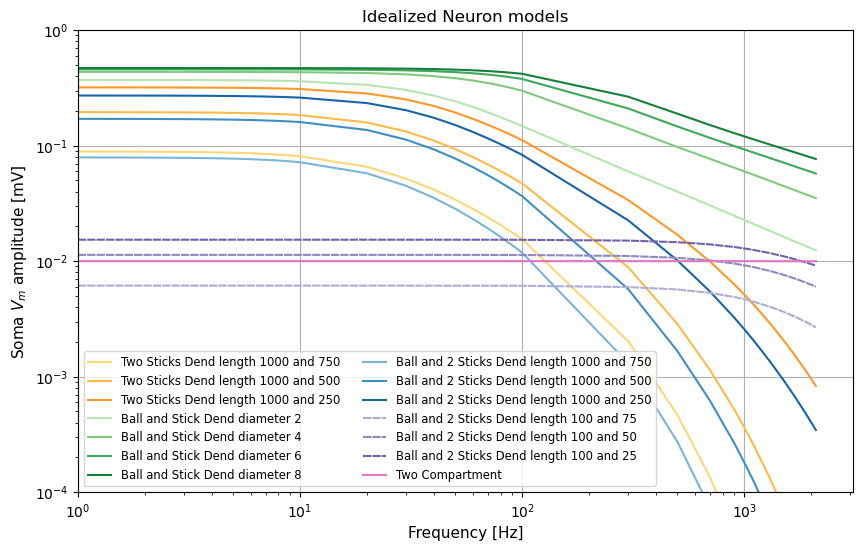

In [10]:
plot_soma_amp_freq(amp_file_path)

/var/folders/bg/0phzw_wj05x5crg_p858d9b80000gn/T/ipykernel_58801/3437668649.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  yellow_sticks = cm.get_cmap('YlOrBr', 256)(np.linspace(0.3, 0.5, len(stick_cells)))
/var/folders/bg/0phzw_wj05x5crg_p858d9b80000gn/T/ipykernel_58801/3437668649.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  green_bns = cm.get_cmap('Greens', 256)(np.linspace(0.3, 0.8, len(bns_cells)))
/var/folders/bg/0phzw_wj05x5crg_p858d9b80000gn/T/ipykernel_58801/3437668649.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.col

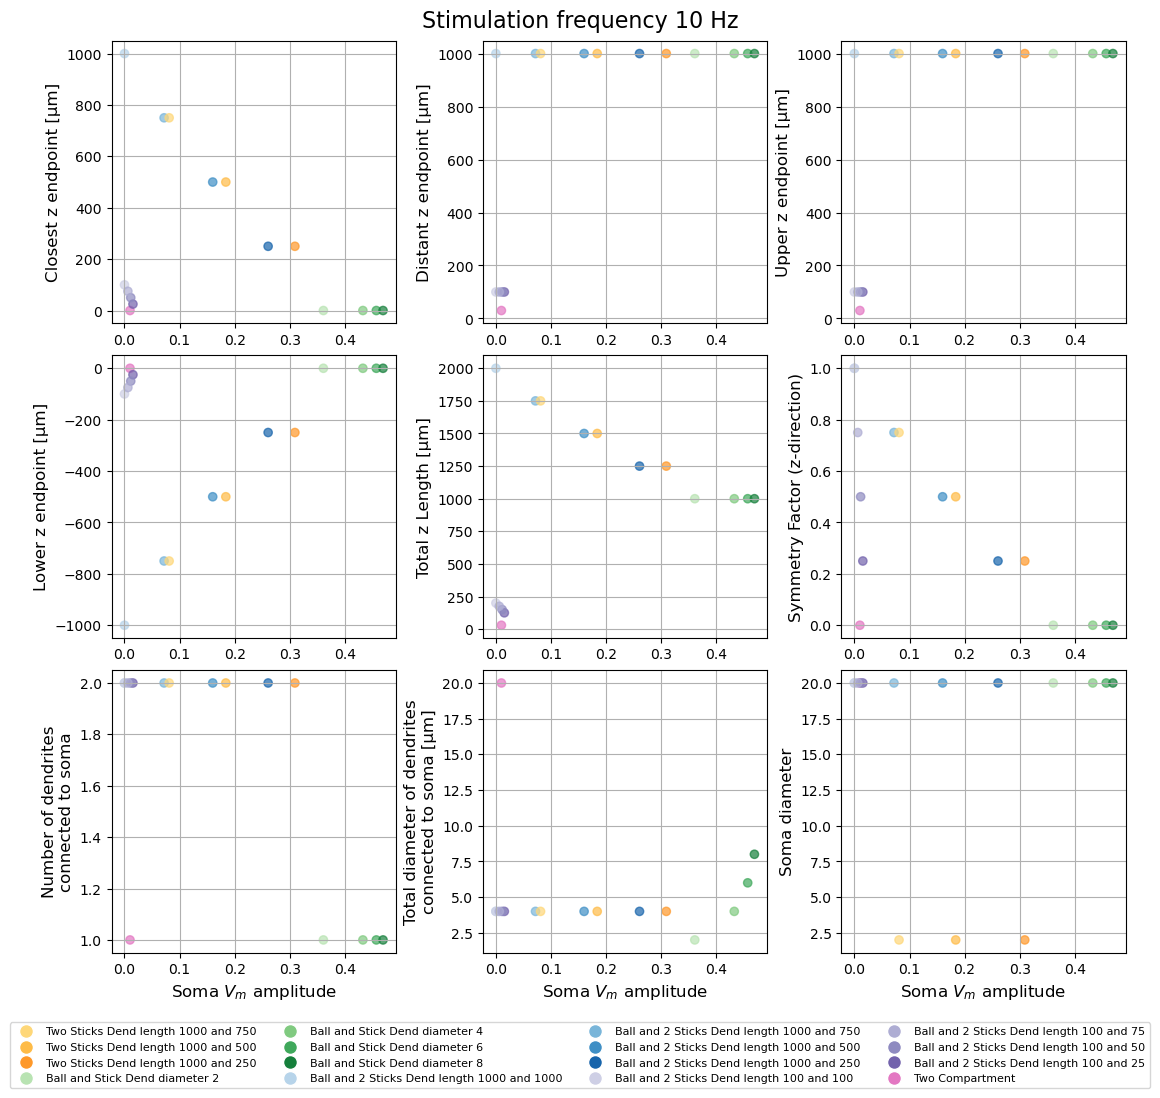

In [11]:
plot_scatter_grid(amp_data, neuron_model_properties, prop_names, frequency = 10)

/var/folders/bg/0phzw_wj05x5crg_p858d9b80000gn/T/ipykernel_58801/3437668649.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  yellow_sticks = cm.get_cmap('YlOrBr', 256)(np.linspace(0.3, 0.5, len(stick_cells)))
/var/folders/bg/0phzw_wj05x5crg_p858d9b80000gn/T/ipykernel_58801/3437668649.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  green_bns = cm.get_cmap('Greens', 256)(np.linspace(0.3, 0.8, len(bns_cells)))
/var/folders/bg/0phzw_wj05x5crg_p858d9b80000gn/T/ipykernel_58801/3437668649.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.col

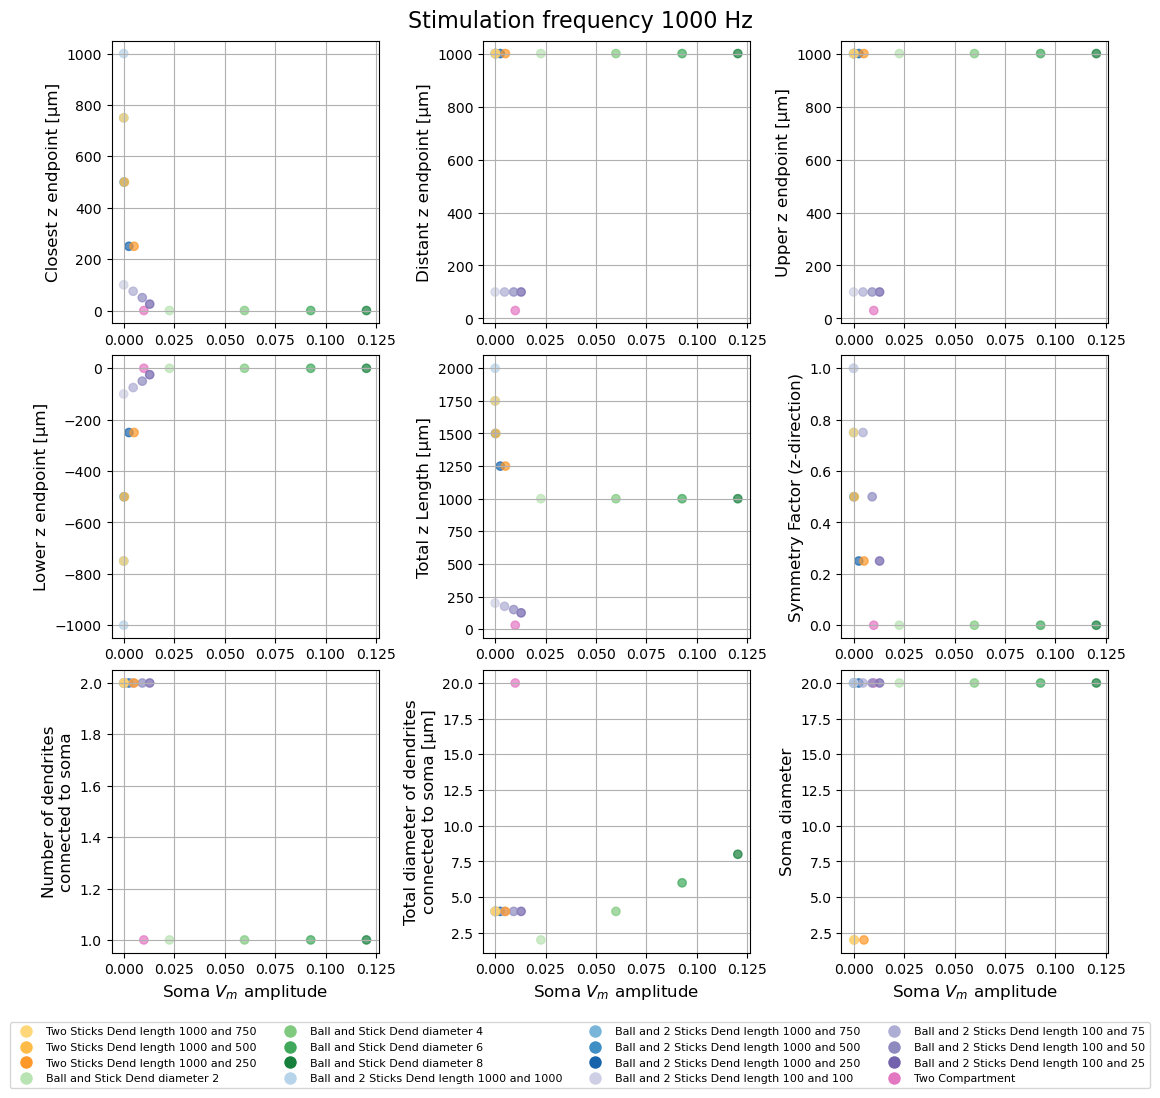

In [12]:
plot_scatter_grid(amp_data, neuron_model_properties, prop_names, frequency = 1000)